<a href="https://colab.research.google.com/github/audivayasmin/KomputasiIntelegensia/blob/main/TaskWeek4_Shafiyah_Audiva_Yasmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Shafiyah Audiva Yasmin

NPM : 2106706880

In [1]:
!pip install d2l==1.0.3

# 8.1 Deep Convolutional Neural Networks (AlexNet)


In [2]:
import torch
from torch import nn
from d2l import torch as d2l

## Representation Learning



In [3]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [4]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

## Training


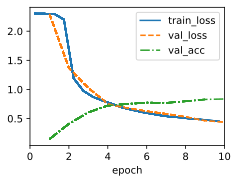

In [5]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

## Exercises

1. Following up on the discussion above, analyze the computational properties of AlexNet.
    1. Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?
    1. Calculate the computational cost for the convolutions and the fully connected layers.
    1. How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?
1. You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?
1. Why do engineers no longer report performance benchmarks on AlexNet?
1. Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why?
1. AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.
    1. Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.
    1. Design a better model that works directly on $28 \times 28$ images.
1. Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.
1. Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?
1. Can you make AlexNet overfit? Which feature do you need to remove or change to break training?


[Discussions](https://discuss.d2l.ai/t/76)


# 8.2 Networks Using Blocks (VGG)

In [6]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## (**VGG Blocks**)

In [7]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

## [**VGG Network**]

In [8]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [9]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


## Training

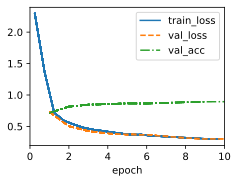

In [10]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Exercises


1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory.
    1. Compare the number of parameters needed for AlexNet and VGG.
    1. Compare the number of floating point operations used in the convolutional layers and in the fully connected layers.
    1. How could you reduce the computational cost created by the fully connected layers?
1. When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?
1. Use Table 1 in the VGG paper :cite:`Simonyan.Zisserman.2014` to construct other common models, such as VGG-16 or VGG-19.
1. Upsampling the resolution in Fashion-MNIST eight-fold from $28 \times 28$ to $224 \times 224$ dimensions is very wasteful. Try modifying the network architecture and resolution conversion, e.g., to 56 or to 84 dimensions for its input instead. Can you do so without reducing the accuracy of the network? Consult the VGG paper :cite:`Simonyan.Zisserman.2014` for ideas on adding more nonlinearities prior to downsampling.

# 8.3 Network in Network (NiN)

In [11]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [12]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

## [**NiN Model**]

In [13]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [14]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


## [**Training**]

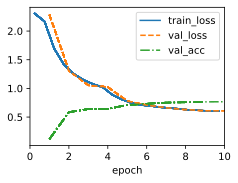

In [15]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Exercises

1. Why are there two $1\times 1$ convolutional layers per NiN block? Increase their number to three. Reduce their number to one. What changes?
1. What changes if you replace the $1 \times 1$ convolutions by $3 \times 3$ convolutions?
1. What happens if you replace the global average pooling by a fully connected layer (speed, accuracy, number of parameters)?
1. Calculate the resource usage for NiN.
    1. What is the number of parameters?
    1. What is the amount of computation?
    1. What is the amount of memory needed during training?
    1. What is the amount of memory needed during prediction?
1. What are possible problems with reducing the $384 \times 5 \times 5$ representation to a $10 \times 5 \times 5$ representation in one step?
1. Use the structural design decisions in VGG that led to VGG-11, VGG-16, and VGG-19 to design a family of NiN-like networks.

# 8.4 Multi-Branch Network (GoogLeNet)

In [16]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## (**Inception Blocks**)

In [17]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

## [**GoogLeNet Model**]

In [18]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [19]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [20]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [21]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [22]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [23]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [24]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


## [**Training**]

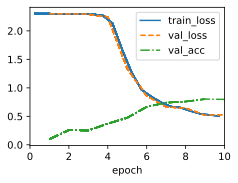

In [25]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Exercises

1. GoogLeNet was so successful that it went through a number of iterations, progressively improving speed and accuracy. Try to implement and run some of them. They include the following:
    1. Add a batch normalization layer :cite:`Ioffe.Szegedy.2015`, as described later in :numref:`sec_batch_norm`.
    1. Make adjustments to the Inception block (width, choice and order of convolutions), as described in :citet:`Szegedy.Vanhoucke.Ioffe.ea.2016`.
    1. Use label smoothing for model regularization, as described in :citet:`Szegedy.Vanhoucke.Ioffe.ea.2016`.
    1. Make further adjustments to the Inception block by adding residual connection :cite:`Szegedy.Ioffe.Vanhoucke.ea.2017`, as described later in :numref:`sec_resnet`.
1. What is the minimum image size needed for GoogLeNet to work?
1. Can you design a variant of GoogLeNet that works on Fashion-MNIST's native resolution of $28 \times 28$ pixels? How would you need to change the stem, the body, and the head of the network, if anything at all?
1. Compare the model parameter sizes of AlexNet, VGG, NiN, and GoogLeNet. How do the latter two network
   architectures significantly reduce the model parameter size?
1. Compare the amount of computation needed in GoogLeNet and AlexNet. How does this affect the design of an accelerator chip, e.g., in terms of memory size, memory bandwidth, cache size, the amount of computation, and the benefit of specialized operations?

# 8.5 Batch Normalization

In [26]:
import torch
from torch import nn
from d2l import torch as d2l

## Training Deep Networks

In [27]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [28]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

## [**LeNet with Batch Normalization**]

In [29]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

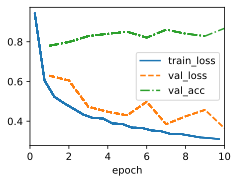

In [30]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [31]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([1.7936, 1.9801, 1.5917, 1.7133, 1.8933, 1.9329], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([-1.1680, -0.7623,  0.6988, -0.9211, -1.1936, -0.4938], device='cuda:0',
        grad_fn=<ViewBackward0>))

## [**Concise Implementation**]

In [32]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

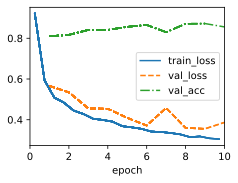

In [33]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Exercises

1. Should we remove the bias parameter from the fully connected layer or the convolutional layer before the batch normalization? Why?
1. Compare the learning rates for LeNet with and without batch normalization.
    1. Plot the increase in validation accuracy.
    1. How large can you make the learning rate before the optimization fails in both cases?
1. Do we need batch normalization in every layer? Experiment with it.
1. Implement a "lite" version of batch normalization that only removes the mean, or alternatively one that
   only removes the variance. How does it behave?
1. Fix the parameters `beta` and `gamma`. Observe and analyze the results.
1. Can you replace dropout by batch normalization? How does the behavior change?
1. Research ideas: think of other normalization transforms that you can apply:
    1. Can you apply the probability integral transform?
    1. Can you use a full-rank covariance estimate? Why should you probably not do that?
    1. Can you use other compact matrix variants (block-diagonal, low-displacement rank, Monarch, etc.)?
    1. Does a sparsification compression act as a regularizer?
    1. Are there other projections (e.g., convex cone, symmetry group-specific transforms) that you can use?


# 8.6 Residual Network (ResNet) and ResNeXt

In [34]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## Function Classes

In [35]:
class Residual(nn.Module):  #@save
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [36]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [37]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

## [**ResNet Model**]

In [38]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [39]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [40]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [41]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

In [42]:
ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


## [**Training**]

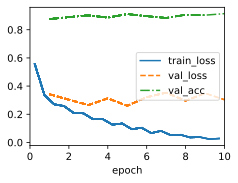

In [43]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## ResNeXt

In [44]:
class ResNeXtBlock(nn.Module):  #@save
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [45]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

## Exercises

1. What are the major differences between the Inception block in :numref:`fig_inception` and the residual block? How do they compare in terms of computation, accuracy, and the classes of functions they can describe?
1. Refer to Table 1 in the ResNet paper :cite:`He.Zhang.Ren.ea.2016` to implement different variants of the network.
1. For deeper networks, ResNet introduces a "bottleneck" architecture to reduce model complexity. Try to implement it.
1. In subsequent versions of ResNet, the authors changed the "convolution, batch normalization, and activation" structure to the "batch normalization, activation, and convolution" structure. Make this improvement yourself. See Figure 1 in :citet:`He.Zhang.Ren.ea.2016*1` for details.
1. Why can't we just increase the complexity of functions without bound, even if the function classes are nested?

# 8.7 Densely Connected Network (DenseNet)

In [46]:
import torch
from torch import nn
from d2l import torch as d2l

## From ResNet to DenseNet

In [47]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [48]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [49]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

## [**Transition Layers**]

In [50]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [51]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

## [**DenseNet Model**]

In [52]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [53]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

## [**Training**]

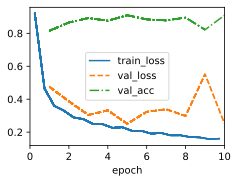

In [54]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## Exercises

1. Why do we use average pooling rather than max-pooling in the transition layer?
1. One of the advantages mentioned in the DenseNet paper is that its model parameters are smaller than those of ResNet. Why is this the case?
1. One problem for which DenseNet has been criticized is its high memory consumption.
    1. Is this really the case? Try to change the input shape to $224\times 224$ to compare the actual GPU memory consumption empirically.
    1. Can you think of an alternative means of reducing the memory consumption? How would you need to change the framework?
1. Implement the various DenseNet versions presented in Table 1 of the DenseNet paper :cite:`Huang.Liu.Van-Der-Maaten.ea.2017`.
1. Design an MLP-based model by applying the DenseNet idea. Apply it to the housing price prediction task in :numref:`sec_kaggle_house`.

# 8.8 Designing Convolution Network Architectures

In [55]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## The AnyNet Design Space

In [56]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

In [57]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

In [58]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

## Distributions and Parameters of Design Spaces (RegNet)

In [59]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

In [60]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


## Training

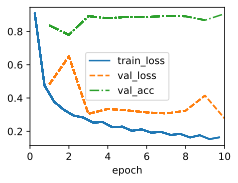

In [61]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## Exercises

1. Increase the number of stages to four. Can you design a deeper RegNetX that performs better?
1. De-ResNeXt-ify RegNets by replacing the ResNeXt block with the ResNet block. How does your new model perform?
1. Implement multiple instances of a "VioNet" family by *violating* the design principles of RegNetX. How do they perform? Which of ($d_i$, $c_i$, $g_i$, $b_i$) is the most important factor?
1. Your goal is to design the "perfect" MLP. Can you use the design principles introduced above to find good architectures? Is it possible to extrapolate from small to large networks?

# Jawaban 8.1

## 1

### 1.1

In [62]:
class Alexnet(d2l.Classifier):
    def __init__(self,lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
                                 nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
                                 nn.LazyConv2d(256, kernel_size=5, padding=2),
                                 nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
                                 nn.LazyConv2d(384, kernel_size=3, padding=1),nn.ReLU(),
                                 nn.LazyConv2d(384, kernel_size=3, padding=1),nn.ReLU(),
                                 nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(num_classes)
                                 )

In [63]:
model = Alexnet()
X = torch.randn(1,3, 224, 224)
_ = model(X)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(model.net):
    if type(module) not in (nn.Linear,nn.Conv2d):
        continue
    num = sum(p.numel() for p in module.parameters())
    # print(f"Module {idx + 1}: {num} parameters type:{type(module)}")
    if type(module) == nn.Conv2d:
        params['conv'] += num

    else:
        params['lr'] += num

params

{'conv': 3747200, 'lr': 43040778}

### 1.2

In [64]:
x = torch.randn(1,3, 224, 224)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(model.net):
    c_i = x.shape[1]
    x = module(x)
    if type(module) == nn.Conv2d:
        k = [p.shape for p in module.parameters()]
        c_o,h_o,w_o = x.shape[1], x.shape[2], x.shape[3]
        params['conv'] += c_i*c_o*h_o*w_o*k[0][-1]*k[0][-2]
    if type(module) == nn.Linear:
        params['lr'] += sum(p.numel() for p in module.parameters())
params

{'conv': 962858112, 'lr': 43040778}

### 1.3

Karakteristik memori, termasuk bandwidth baca dan tulis, latensi, dan ukuran, memiliki dampak signifikan pada komputasi baik dalam pelatihan maupun inferensi jaringan neural. Faktor-faktor ini memengaruhi kinerja, efisiensi, dan kecepatan komputasi secara keseluruhan. Berikut ringkasan bagaimana aspek-aspek memori tersebut memengaruhi komputasi dan perbedaan potensial antara pelatihan dan inferensi:

**Bandwidth Baca dan Tulis**:
- **Efek**: Bandwidth tinggi mempercepat perpindahan data antara memori dan unit pemrosesan, memungkinkan pengambilan dan penyimpanan data lebih efisien.
- **Dampak**: Akses data lebih cepat meningkatkan throughput komputasi, mengurangi waktu tunggu data, sehingga mempercepat pelatihan dan inferensi.
- **Pelatihan vs Inferensi**: Keduanya diuntungkan dari bandwidth tinggi karena perpindahan data sering menjadi hambatan.

**Latensi**:
- **Efek**: Latensi adalah waktu yang dibutuhkan untuk mengakses data dari memori. Latensi rendah mempercepat akses data dan komputasi.
- **Dampak**: Akses memori dengan latensi rendah mengurangi waktu tunggu data, meningkatkan kecepatan pemrosesan.
- **Pelatihan vs Inferensi**: Latensi memengaruhi keduanya. Dalam pelatihan, pembaruan bobot dan komputasi gradien memerlukan akses data dengan latensi rendah, sedangkan inferensi memerlukan respon cepat untuk aplikasi waktu nyata.

**Ukuran Memori**:
- **Efek**: Ukuran memori menentukan berapa banyak data yang bisa disimpan. Memori yang lebih besar memungkinkan lebih banyak data di-cache, mengurangi perpindahan data yang sering.
- **Dampak**: Memori yang cukup memungkinkan caching data yang efisien, menghindari kemacetan memori.
- **Pelatihan vs Inferensi**: Keduanya memerlukan memori yang cukup untuk menyimpan hasil antara. Dalam pelatihan, memori besar diperlukan untuk gradien, aktivasi, dan parameter model, sedangkan dalam inferensi, diperlukan untuk menyimpan hasil sementara selama proses feedforward.

**Perbedaan Pelatihan dan Inferensi**:
- Dalam pelatihan, bandwidth memori sangat penting karena seringnya pembaruan bobot dan gradien selama backpropagation. Proses batch memperbesar kebutuhan bandwidth.
- Dalam inferensi, latensi rendah dan bandwidth tinggi penting untuk aplikasi waktu nyata, dengan fokus lebih pada latensi dan waktu respons.

**Hierarki Memori**:
- Arsitektur modern memiliki tingkatan memori dengan karakteristik yang berbeda (misalnya cache, memori GPU, memori utama). Mengoptimalkan penempatan dan perpindahan data di berbagai tingkatan ini sangat penting untuk kinerja.

Secara keseluruhan, karakteristik memori seperti bandwidth tinggi, latensi rendah, ukuran memori yang cukup, dan hierarki memori yang efisien sangat penting untuk kinerja optimal dalam pelatihan dan inferensi jaringan neural.

## 2

Mengoptimalkan keseimbangan antara komputasi dan bandwidth memori dalam desain chip adalah tugas yang kompleks. Berikut langkah-langkah untuk mengoptimalkan trade-off ini:

1. **Tentukan Tujuan Kinerja**: Pahami kebutuhan aplikasi (misalnya, inferensi waktu nyata, pelatihan batch, efisiensi energi) dan tetapkan target kinerja terkait kecepatan komputasi, akses memori, dan efisiensi sistem.
2. **Profil Beban Kerja**: Analisis beban kerja aplikasi, termasuk pola akses memori, ukuran data, dan frekuensi komunikasi antara komputasi dan memori.
3. **Eksplorasi Arsitektur**: Eksplorasi opsi arsitektur untuk menentukan keseimbangan optimal antara unit komputasi dan subsistem memori (misalnya, ukuran cache, hierarki memori).
4. **Desain Hierarki Memori**: Rancang hierarki memori untuk akses data yang efisien dan minimalkan hambatan memori, dengan mempertimbangkan jenis memori (SRAM, DRAM) dan arsitektur interkoneksi.
5. **Efisiensi Daya**: Optimalkan konsumsi daya melalui teknik seperti DVFS, clock gating, dan kebijakan akses memori yang efisien energi.
6. **Area Chip dan Integrasi**: Seimbangkan area chip antara komputasi dan memori berdasarkan kebutuhan kinerja dan biaya.
7. **Peningkatan Bandwidth Memori**: Tingkatkan bandwidth memori dengan bus lebar, antarmuka memori berkecepatan tinggi (misalnya, HBM, GDDR), dan desain pengontrol memori yang efisien.
8. **Paralelisme dan Pipeline**: Terapkan paralelisme dan pipelining untuk mengurangi dampak latensi memori pada kinerja.
9. **Simulasi dan Pemodelan**: Gunakan alat simulasi untuk mengevaluasi desain dan konfigurasi yang berbeda.
10. **Loop Umpan Balik**: Refinement desain berdasarkan hasil simulasi dan benchmark.
11. **Validasi dan Pengujian**: Uji dan validasi desain pada berbagai beban kerja.
12. **Pertimbangan Dunia Nyata**: Pertimbangkan batasan manufaktur, biaya, dan waktu ke pasar.

Optimasi ini memerlukan pertimbangan kinerja, daya, area, dan biaya, serta kolaborasi antara arsitek chip, desainer, dan ahli domain.

## 3

**AlexNet Usang**: AlexNet, meskipun pionir, diperkenalkan pada 2012 dan tidak lagi mewakili model terdepan dalam hal efisiensi dan akurasi dibanding model terbaru.

**Kemajuan Arsitektur**: Arsitektur lebih canggih seperti VGG, ResNet, Inception, dan model berbasis Transformer (BERT, GPT) sekarang lebih populer dan memberikan akurasi serta efisiensi yang lebih baik daripada AlexNet.

**Model Khusus Domain**: Tergantung pada aplikasinya, insinyur lebih suka menggunakan model yang disesuaikan, seperti EfficientNet untuk klasifikasi gambar atau Faster R-CNN untuk deteksi objek.

**Benchmark yang Beragam**: Peneliti kini menguji model di berbagai dataset dan tugas untuk mengevaluasi performa di skenario yang berbeda, bukan hanya satu benchmark.

**Aplikasi Dunia Nyata**: Fokus saat ini lebih pada benchmarking model di aplikasi dunia nyata seperti analisis gambar medis, kendaraan otonom, dan pemahaman bahasa alami, menjauh dari AlexNet.

**Perkembangan Perangkat Keras & Lunak**: Benchmark dipengaruhi oleh perangkat keras dan perangkat lunak terbaru, sehingga insinyur lebih sering membandingkan model baru yang dioptimalkan untuk teknologi terkini.

**Arah Riset**: Riset deep learning kini mengeksplorasi aspek seperti interpretabilitas, ketahanan, dan keadilan model, yang lebih diprioritaskan dibanding penggunaan model lama seperti AlexNet untuk benchmark.

Tren ini terus berkembang, dan untuk informasi terbaru, periksa prosiding konferensi, makalah riset, dan benchmark terkini.

## 4

In [65]:
import warnings
from torchsummary import summary
warnings.filterwarnings("ignore")

In [ ]:
model = Alexnet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, data)

## 5

In [ ]:
class SmallAlexnet(d2l.Classifier):
    def __init__(self,lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(512, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(512, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(1024), nn.ReLU(),
            nn.LazyLinear(num_classes)
            )

## 6

## 7

In [ ]:
class LeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(6, kernel_size=5, padding=2),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.LazyConv2d(16, kernel_size=5),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.Flatten(),
                                 nn.LazyLinear(120),
                                 nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(84),
                                 nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(num_classes))
model = LeNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

## 8

Ya, AlexNet dapat sengaja dibuat overfitting dengan memanipulasi beberapa aspek dari proses pelatihan. Overfitting terjadi ketika model sangat bagus pada data pelatihan tetapi gagal menggeneralisasi ke data yang belum pernah dilihat. Berikut beberapa cara untuk membuat AlexNet overfitting:

1. **Data Pelatihan Terbatas**: Kurangi jumlah data pelatihan secara signifikan. Dengan sedikit data, model akan cenderung menghafal data tersebut.
2. **Model Kompleks**: Tambahkan lebih banyak lapisan, unit, atau filter sehingga model memiliki parameter yang terlalu banyak untuk data kecil.
3. **Kurangi Regularisasi**: Hilangkan teknik regularisasi seperti dropout, weight decay, dan augmentasi data yang membantu mencegah overfitting.
4. **Tingkat Pembelajaran Rendah**: Gunakan learning rate yang sangat kecil, sehingga model belajar terlalu lambat dan tidak bisa menggeneralisasi dengan baik.
5. **Sedikit Epoch**: Latih model dalam jumlah epoch yang terbatas, sehingga model belum cukup waktu untuk mempelajari pola yang bermakna.
6. **Label Bersih**: Gunakan label yang bersih tanpa kesalahan, karena label real-world sering mengandung kesalahan yang membantu mencegah overfitting.
7. **Tanpa Augmentasi**: Hindari teknik augmentasi data, yang biasanya membantu meningkatkan generalisasi model.
8. **Optimizers Kompleks**: Gunakan optimizer seperti Adam dengan pengaturan default yang bisa menyebabkan overfitting lebih cepat.

Kombinasi perubahan ini akan membuat AlexNet overfitting pada data pelatihan. Namun, dalam praktiknya, overfitting dihindari dengan regularisasi, augmentasi data, dan penyesuaian hyperparameter agar model dapat menggeneralisasi dengan baik.

# Jawaban 8.2

## 1

In [ ]:
def stat_params(net, params):
    for idx, module in enumerate(net):
        if type(module) not in (nn.Linear,nn.Conv2d):
            continue
        num = sum(p.numel() for p in module.parameters())
        if type(module) == nn.Conv2d:
            params['conv'] += num
        else:
            params['lr'] += num

def stat_comp(net, params, x):
    for idx, module in enumerate(net):
        c_i = x.shape[1]
        x = module(x)
        if type(module) == nn.Conv2d:
            k = [p.shape for p in module.parameters()]
            c_o,h_o,w_o = x.shape[1], x.shape[2], x.shape[3]
            params['conv'] += c_i*c_o*h_o*w_o*k[0][-1]*k[0][-2]
        if type(module) == nn.Linear:
            params['lr'] += sum(p.numel() for p in module.parameters())
    return x


def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(*conv_blks, nn.Flatten(),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

### 1.1

In [ ]:
arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
vgg = VGG(arch=arch)

# Move the model to the CUDA device if available
if torch.cuda.is_available():
    vgg.cuda()

X = torch.randn(1,3, 224, 224)

# Move the input tensor to the same device as the model
if torch.cuda.is_available():
    X = X.cuda()

_ = vgg(X)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(vgg.net):
    if type(module) == nn.Sequential:
        stat_params(module,params)
    if type(module) == nn.Linear:
        num = sum(p.numel() for p in module.parameters())
        params['lr'] += num
summary(vgg, (3, 224, 224))
params

### 1.2

In [ ]:
x = torch.randn(1,3, 224, 224)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(vgg.net):
    if type(module) == nn.Sequential:
        x = stat_comp(module, params, x)
    if type(module) == nn.Linear:
        params['lr'] += sum(p.numel() for p in module.parameters())
params

In [ ]:
X = torch.randn(1,3, 224, 224)
_ = vgg(X)
total_params = sum(p.numel() for p in vgg.parameters())
print("Total parameters:", total_params)

### 1.3

Mengurangi biaya komputasi pada lapisan fully connected dapat meningkatkan efisiensi jaringan neural tanpa mengorbankan kinerja. Berikut beberapa strategi untuk mencapainya:

1. **Global Average Pooling (GAP)**: Gantikan fully connected dengan GAP untuk mengurangi jumlah parameter dan komputasi sambil mempertahankan informasi penting.
2. **Ganti dengan Lapisan Konvolusi**: Ubah fully connected menjadi lapisan konvolusi 1x1, memungkinkan berbagi bobot dan mengurangi jumlah parameter.
3. **Network Pruning**: Identifikasi dan hilangkan koneksi, neuron, atau filter yang tidak diperlukan untuk mengurangi komputasi tanpa mengurangi akurasi.
4. **Low-Rank Approximations**: Gunakan matriks low-rank dengan teknik seperti SVD untuk mengurangi parameter dan mempercepat komputasi.
5. **Dimensionality Reduction**: Terapkan teknik reduksi dimensi seperti PCA untuk mengurangi input ke lapisan fully connected.
6. **Depthwise Separable Convolutions**: Gantikan fully connected dengan depthwise separable convolutions untuk mengurangi komputasi.
7. **Quantization**: Kurangi presisi fully connected ke 8-bit untuk menghemat memori dan komputasi.
8. **Knowledge Distillation**: Latih jaringan kecil (student) untuk meniru kinerja jaringan besar (teacher) guna mengurangi biaya komputasi.
9. **Model Compression**: Gunakan teknik kompresi model seperti Huffman coding dan weight sharing.
10. **Arsitektur Hibrida**: Gabungkan lapisan konvolusi dan fully connected di area penting saja.

Efektivitas strategi ini bervariasi tergantung arsitektur, dataset, dan tugas, sehingga perlu eksperimentasi dan tuning.

## 2

Blok konvolusi dianggap sebagai satu lapisan dalam jaringan, dan tiga blok konvolusi terakhir di VGG masing-masing mengandung dua lapisan konvolusi, yang merupakan tiga lapisan tersisa.

In [ ]:
vgg

## 3

In [ ]:
arch16=((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))
vgg16 = VGG(arch=arch16)
vgg16

In [ ]:
arch19=((2, 64), (2, 128), (4, 256), (4, 512), (4, 512))
vgg19 = VGG(arch=arch19)
vgg19

## 4

In [ ]:
model = VGG(arch=((3, 128), (3, 256)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28))
trainer.fit(model, data)

# Jawban 8.3

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding, conv1s=[[1,0],[1,0]]):
    layers = [nn.LazyConv2d(out_channels, kernel_size=kernel_size, stride=strides, padding=padding),nn.ReLU()]
    for conv1_size,conv1_padding in conv1s:
        layers.append(nn.LazyConv2d(out_channels, kernel_size=conv1_size,padding=conv1_padding))
        layers.append(nn.ReLU())
    return nn.Sequential(*layers)

class Nin(d2l.Classifier):
    def __init__(self, arch, lr=0.1):
        super().__init__()
        self.save_hyperparameters()
        layers = []
        for i in range(len(arch)-1):
            # Pass the first four elements of the tuple as arguments
            layers.append(nin_block(*arch[i][:4], conv1s=[[1,0],[1,0]])) # The fifth element was being passed as conv1s
            layers.append(nn.MaxPool2d(3, stride=2))
        layers.append(nn.Dropout(0.5))
        # Pass the first four elements of the tuple as arguments
        layers.append(nin_block(*arch[-1][:4], conv1s=[[1,0],[1,0]])) # The fifth element was being passed as conv1s
        layers.append(nn.AdaptiveAvgPool2d((1, 1)))
        layers.append(nn.Flatten())
        self.net = nn.Sequential(*layers)
        self.net.apply(d2l.init_cnn)

## 1

In [ ]:
arch = ((96,11,4,0,3),(256,5,1,2,3),(384,3,1,1,3),(10,3,1,1,3))
model = Nin(arch)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

In [ ]:
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
arch = ((96,11,4,0,[[1,0]]),(256,5,1,2,[[1,0]]),(384,3,1,1,[[1,0]]),(10,3,1,1,[[1,0]]))
model = Nin(arch, lr=0.05)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

## 2

In [ ]:
arch = ((96,11,4,0,[[3,1],[3,1]]),(256,5,1,2,[[3,1],[3,1]]),(384,3,1,1,[[3,1],[3,1]]),(10,3,1,1,[[3,1],[3,1]]))
model = Nin(arch)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

## 3

In [ ]:
class MLPNin(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        layers = []
        for i in range(len(arch)-1):
            layers.append(nin_block(*arch[i]))
            layers.append(nn.MaxPool2d(3, stride=2))
        layers.append(nn.Dropout(0.5))
        layers.append(nin_block(*arch[-1]))
        layers.append(nn.Flatten())
        layers.append(nn.LazyLinear(num_classes))
        self.net = nn.Sequential(*layers)
        self.net.apply(d2l.init_cnn)

## 4

### 4.1

In [ ]:
arch = ((96,11,4,0,2),(256,5,1,2,2),(384,3,1,1,2),(10,3,1,1,2))
model = Nin(arch)
X = torch.randn(1,3, 224, 224)
_ = model(X)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

### 4.2

In [ ]:
from thop import profile
flops, params = profile(model, inputs=(X,))
print("Total FLOPs:", flops)

### 4.3

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize memory counters
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
memory_stats = torch.cuda.memory_stats(device=device)
# Print peak memory usage and other memory statistics
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

### 4.4

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
_ = model(X)
memory_stats = torch.cuda.memory_stats(device=device)
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

## 5

Mengurangi representasi 384×5×5 menjadi 10×5×5 dalam satu langkah di arsitektur Network in Network (NiN) dapat menimbulkan beberapa masalah:

1. **Kehilangan Informasi**: Pengurangan saluran secara drastis dapat menyebabkan hilangnya fitur dan pola penting yang dipelajari jaringan.
2. **Underfitting**: Representasi 10 saluran mungkin tidak cukup untuk menangkap kompleksitas data asli, sehingga model bisa underfitting dan kinerjanya menurun.
3. **Bottleneck Informasi**: Pengurangan yang tajam menciptakan bottleneck, membatasi kemampuan jaringan untuk mengolah input secara efektif.
4. **Ekspresivitas Berkurang**: Pengurangan saluran yang terlalu cepat membatasi kemampuan model untuk belajar fitur hierarkis tingkat tinggi.
5. **Fitur Spasial Hilang**: Representasi 10×5×5 mungkin gagal menangkap pola spasial penting, sehingga jaringan kurang mampu mengenali objek.
6. **Kehilangan Daya Diskriminatif**: Dengan representasi lebih kecil, jaringan bisa kesulitan membedakan kelas yang berbeda, menurunkan akurasi.

Untuk mengatasi masalah ini, biasanya dilakukan pengurangan saluran secara bertahap melalui lapisan-lapisan perantara, seperti yang diterapkan dalam arsitektur NiN dengan beberapa blok berturut-turut.

## 6

In [ ]:
arch = ((96,11,4,0,2),(256,5,1,2,2),(384,3,1,1,2),(10,3,1,1,2))
nin = Nin(arch)
nin

In [ ]:
arch15 = ((64,3,2,1),
          (256,3,1,1),
          (256,3,1,1),
          (384,3,1,1),
          (10,3,1,1))
nin15 = Nin(arch15)
nin15

# Jawaban 8.4

## 1

### 1.1

In [ ]:
class NormInception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=3, padding=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=5, padding=2),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyBatchNorm2d(),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o3 = self.b3(x)
        o4 = self.b4(x)
        return torch.cat((o1,o2,o3,o4),dim=1)

class NormGoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
                             nn.LazyBatchNorm2d(),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b2(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=1),
                             nn.LazyBatchNorm2d(),nn.ReLU(),
                             nn.LazyConv2d(192, kernel_size=3, padding=1),
                             nn.LazyBatchNorm2d(), nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b3(self):
        return nn.Sequential(NormInception(64, (96, 128), (16, 32), 32),
                             NormInception(128, (128, 192), (32, 96), 64),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b4(self):
        return nn.Sequential(NormInception(192, (96, 208), (16, 48), 64),
                             NormInception(160, (112, 224), (24, 64), 64),
                             NormInception(128, (128, 256), (24, 64), 64),
                             NormInception(112, (144, 288), (32, 64), 64),
                             NormInception(256, (160, 320), (32, 128), 128),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b5(self):
        return nn.Sequential(NormInception(256, (160, 320), (32, 128), 128),
                             NormInception(384, (192, 384), (48, 128), 128),
                             nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                                 self.b5(), nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

### 1.2

In [ ]:
class Inception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=3, padding=1),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=3, padding=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[2], kernel_size=3, padding=1),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o3 = self.b3(x)
        o4 = self.b4(x)
        return torch.cat((o1,o2,o3,o4),dim=1)

In [ ]:
class Inception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[2], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[2], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[3], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[4], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o3 = self.b3(x)
        o4 = self.b4(x)
        return torch.cat((o1,o2,o3,o4),dim=1)

In [ ]:
class Inception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.ReLU())
        self.b2_1 = nn.Sequential(nn.LazyConv2d(c2[1], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU())
        self.b2_2 = nn.Sequential(nn.LazyConv2d(c2[2], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=3, padding=1),
                                nn.ReLU())
        self.b3_1 = nn.Sequential(nn.LazyConv2d(c3[2], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU())
        self.b3_2 = nn.Sequential(nn.LazyConv2d(c3[3], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o2_1 = self.b2_1(o2)
        o2_2 = self.b2_2(o2)
        o3 = self.b3(x)
        o3_1 = self.b3_1(o3)
        o3_2 = self.b3_2(o2)
        o4 = self.b4(x)
        return torch.cat((o1,o2_1,o2_2,o3_1,o3_2,o4),dim=1)

### 1.3

In [ ]:
class LSRGoogleNet(GoogleNet):
    def __init__(self, eps=0, lr=0.1, num_classes=10):
        super().__init__(lr=lr, num_classes=num_classes)
        self.save_hyperparameters()

    def loss(self, y_hat, y, averaged=True):
        y_hat = y_hat.reshape((-1, y_hat.shape[-1]))
        y = y.reshape((-1,))
        u = torch.ones(y.shape).tye(torch.float32)/y.shape[-1]
        lsr_loss = (1-self.eps)*F.cross_entropy(y_hat, y, reduction='mean' if averaged else 'none')
        +self.eps*F.cross_entropy(y_hat, u, reduction='mean' if averaged else 'none')
        return lsr_loss

### 1.4

In [ ]:
class ResInception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=3, padding=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=5, padding=2),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyBatchNorm2d(),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)+x
        o2 = self.b2(x)+x
        o3 = self.b3(x)+x
        o4 = self.b4(x)+x
        return torch.cat((o1,o2,o3,o4),dim=1)

class ResGoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
                             nn.LazyBatchNorm2d(),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b2(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=1),
                             nn.LazyBatchNorm2d(),nn.ReLU(),
                             nn.LazyConv2d(192, kernel_size=3, padding=1),
                             nn.LazyBatchNorm2d(), nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b3(self):
        return nn.Sequential(ResInception(64, (96, 128), (16, 32), 32),
                             ResInception(128, (128, 192), (32, 96), 64),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b4(self):
        return nn.Sequential(ResInception(192, (96, 208), (16, 48), 64),
                             ResInception(160, (112, 224), (24, 64), 64),
                             ResInception(128, (128, 256), (24, 64), 64),
                             ResInception(112, (144, 288), (32, 64), 64),
                             ResInception(256, (160, 320), (32, 128), 128),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b5(self):
        return nn.Sequential(ResInception(256, (160, 320), (32, 128), 128),
                             ResInception(384, (192, 384), (48, 128), 128),
                             nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                                 self.b5(), nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

## 2


In [ ]:


import torch
from torch import nn
from d2l import torch as d2l


class Inception(nn.Module):
    # ... existing code ...
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=3, padding=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=5, padding=2),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyBatchNorm2d(),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())

    def forward(self, X):
        b1 = self.b1(X)
        b2 = self.b2(X)
        b3 = self.b3(X)
        b4 = self.b4(X)
        return torch.cat((b1, b2, b3, b4), dim=1)

In [ ]:
class GoogleNet(d2l.Classifier):
    """
    GoogLeNet with changes to accomodate small image sizes
    """
    def b1(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
                             nn.LazyBatchNorm2d(),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b2(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=1),
                             nn.LazyBatchNorm2d(),nn.ReLU(),
                             nn.LazyConv2d(192, kernel_size=3, padding=1),
                             nn.LazyBatchNorm2d(), nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b3(self):
        return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                             Inception(128, (128, 192), (32, 96), 64),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b4(self):
        return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                             Inception(160, (112, 224), (24, 64), 64))

    def __init__(self, lr=0.1, num_classes=10): # Added lr to the __init__ method
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                                 nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
model = GoogleNet(lr=0.01)
X = torch.randn(1,1,32,32)
model(X)
for m in model.net:
    X = m(X)
    print(X.shape)

In [ ]:
model = GoogleNet(lr=0.01)
X = torch.randn(1,1,64,64)
model(X)
for m in model.net:
    X = m(X)
    print(X.shape)

## 3

In [ ]:
class SmallGoogLeNet():
    def b1(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=5, stride=1, padding=2),
                             nn.ReLU(),
                             # nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
                            )

def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1(),self.b2(), self.b3(), self.b4(),
                                 self.b5(), nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

## 4

In [ ]:
model = GoogleNet(lr=0.01)
X = torch.randn(1,3, 224, 224)
_ = model(X)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

## 5

GoogLeNet dan AlexNet adalah arsitektur jaringan neural dalam, tetapi memiliki perbedaan signifikan dalam kebutuhan komputasi karena desainnya:

1. **Kebutuhan Komputasi**:
   - **GoogLeNet**: Menggunakan modul Inception dengan jalur konvolusi paralel yang mengurangi komputasi tiap jalur. Penggunaan konvolusi 1x1 juga mengurangi jumlah parameter dan komputasi.
   - **AlexNet**: Memiliki arsitektur yang lebih sederhana dengan lapisan konvolusi dan pooling, tetapi komputasi cenderung lebih tinggi karena ukuran filter yang seragam dan arsitektur yang lebih dalam.

2. **Ukuran Memori dan Bandwidth**:
   - **GoogLeNet**: Jalur paralel memungkinkan pemanfaatan memori yang lebih efisien, sehingga mengurangi kebutuhan ruang memori besar dan bandwidth.
   - **AlexNet**: Memerlukan ruang memori yang lebih besar untuk menyimpan hasil perantara, sehingga membutuhkan bandwidth memori yang lebih tinggi.

3. **Ukuran Cache**:
   - **GoogLeNet**: Paralelisme bisa memanfaatkan ukuran cache yang lebih besar.
   - **AlexNet**: Arsitektur yang lebih dalam bisa memanfaatkan cache yang lebih besar karena sifat komputasinya yang berurutan.

4. **Jumlah Komputasi**:
   - **GoogLeNet**: Lebih efisien dalam hal komputasi karena memanfaatkan paralelisme dan pengurangan dimensi.
   - **AlexNet**: Membutuhkan lebih banyak komputasi karena ukuran filter seragam dan kedalaman arsitektur.

5. **Operasi Khusus**: Kedua arsitektur bisa diuntungkan dengan operasi khusus pada chip akselerator, seperti konvolusi 1x1 dan konvolusi depth-wise separable.

**Desain Chip Akselerator**:
- **Memori**: GoogLeNet memerlukan struktur memori yang mampu menyimpan hasil jalur paralel, sementara AlexNet memerlukan kapasitas memori yang lebih besar.
- **Bandwidth Memori**: Chip harus menyediakan bandwidth yang cukup untuk memindahkan data antar lapisan secara efisien.
- **Cache**: Cache yang lebih besar diperlukan untuk mengurangi latensi akses memori.
- **Operasi Khusus**: Unit perangkat keras khusus untuk konvolusi 1x1 dan depth-wise separable dapat meningkatkan efisiensi.

Secara keseluruhan, perbedaan komputasi antara GoogLeNet dan AlexNet memengaruhi desain chip akselerator dalam aspek memori, bandwidth, cache, dan operasi khusus.

# Jawaban 8.5

## 1

**Normalisasi Batch** adalah teknik yang membantu menstabilkan dan mempercepat pelatihan jaringan neural dalam. Teknik ini menormalkan aktivasi dalam sebuah lapisan dengan mengurangi rata-rata dan membagi dengan deviasi standar dari mini-batch. Aktivasi yang dinormalisasi kemudian diskalakan dan digeser menggunakan parameter yang dapat dipelajari, yaitu parameter skala (gamma) dan geser (beta).

**Rekomendasi untuk Lapisan Terhubung Penuh (Fully Connected)**:
- **Hapus Bias**: Disarankan untuk menghapus parameter bias dari lapisan terhubung penuh sebelum menerapkan normalisasi batch. Hal ini untuk menghindari redundansi antara bias dan parameter beta dari normalisasi batch.

**Rekomendasi untuk Lapisan Konvolusi**:
- **Dengan Bias**: Beberapa arsitektur menggunakan parameter bias dalam lapisan konvolusi sebelum normalisasi batch. Parameter ini bisa memberikan fleksibilitas dalam pemodelan, terutama di tahap awal jaringan.
- **Tanpa Bias**: Jika Anda memilih untuk menghapus parameter bias sebelum normalisasi batch, maka normalisasi batch akan menangani baik penggeseran maupun penskalaan aktivasi.

Kefektifan pilihan ini juga tergantung pada arsitektur spesifik, dataset, dan proses optimisasi yang digunakan. Oleh karena itu, seringkali ide yang baik untuk bereksperimen dengan konfigurasi yang berbeda untuk menemukan pengaturan terbaik untuk kebutuhan spesifik Anda.

Untuk lapisan terhubung penuh, umumnya disarankan untuk menghapus parameter bias sebelum menerapkan normalisasi batch. Untuk lapisan konvolusi, Anda memiliki fleksibilitas untuk memilih apakah akan menyertakan atau mengecualikan parameter bias berdasarkan pilihan desain dan pertimbangan kinerja Anda.

## 2

In [ ]:
!pip install -U d2l # Make sure you have the latest version of d2l installed

import torch
from torch import nn
from d2l import torch as d2l #Import the d2l.torch module

class LeNet(d2l.Classifier):  #@save
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

def stat_model_acc(model, data, plot_flag):
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
    trainer = d2l.Trainer(max_epochs=10, num_gpus=1,plot_flag=plot_flag)
    trainer.fit(model, data)
    X,y = next(iter(data.get_dataloader(False)))
    X = X.to('cuda')
    y = y.to('cuda')
    y_hat = model(X)
    return model.accuracy(y_hat,y).item()

### 2.1

In [ ]:
def stat_model_acc(model, data): # Removed plot_flag parameter
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
    trainer = d2l.Trainer(max_epochs=10, num_gpus=1) # Removed plot_flag argument
    trainer.fit(model, data)
    X,y = next(iter(data.get_dataloader(False)))
    X = X.to('cuda')
    y = y.to('cuda')
    y_hat = model(X)
    return model.accuracy(y_hat,y).item()

In [ ]:
data = d2l.FashionMNIST(batch_size=128)
lr_list = [0.001,0.01,0.03,0.1,0.3]
le_accs= []
ble_accs = []
for lr in lr_list[:1]:
    le = LeNet(lr=lr)
    ble = BNLeNet(lr=lr)
    le_accs.append(stat_model_acc(le, data)) # Removed plot_flag argument
    ble_accs.append(stat_model_acc(ble, data)) # Removed plot_flag argument

### 2.2

In [ ]:
data = d2l.FashionMNIST(batch_size=128)
lr_list = [1,3,10,30]
le_accs= []
ble_accs = []
for lr in lr_list:
	le = LeNet(lr=lr)
	ble = BNLeNet(lr=lr)
	le_accs.append(stat_model_acc(le, data))
	ble_accs.append(stat_model_acc(ble, data))

## 3

Menggunakan normalisasi batch di setiap lapisan jaringan neural bukanlah aturan yang ketat, melainkan pilihan desain yang bergantung pada masalah spesifik, arsitektur, dan dinamika pelatihan. Keputusan ini dapat mempengaruhi konvergensi model, kinerja, dan stabilitas pelatihan. Berikut beberapa pertimbangannya:

**Keuntungan Normalisasi Batch di Setiap Lapisan:**
- **Stabilisasi Pelatihan**: Menerapkan normalisasi batch di setiap lapisan membantu menstabilkan pelatihan dengan menormalkan aktivasi dan mengurangi pergeseran kovariat internal, yang dapat mempercepat konvergensi dan propagasi gradien yang lebih stabil.
- **Regulasi**: Normalisasi batch memiliki efek regulasi yang dapat membantu mencegah overfitting. Menerapkannya di setiap lapisan dapat memberikan regulasi yang konsisten di seluruh jaringan.
- **Arsitektur Lebih Dalam**: Untuk jaringan yang sangat dalam, menerapkan normalisasi batch di setiap lapisan dapat membantu mengatasi masalah hilangnya/ledakan gradien.
- **Kurang Sensitif terhadap Inisialisasi**: Normalisasi batch dapat mengurangi sensitivitas terhadap inisialisasi bobot, memungkinkan penggunaan laju pembelajaran yang lebih besar.

 **Pertimbangan Menentang Normalisasi Batch di Setiap Lapisan:**
- **Kapasitas Model yang Berkurang**: Normalisasi batch dapat mengurangi kapasitas jaringan untuk menyesuaikan data pelatihan, yang dapat menyebabkan underfitting.
- **Pelatihan yang Lebih Lambat**: Menambahkan normalisasi batch di setiap lapisan meningkatkan overhead komputasi, yang dapat memperlambat pelatihan.
- **Kehilangan Ekspresivitas**: Normalisasi yang berlebihan dapat menghilangkan informasi berguna dari aktivasi, membatasi ekspresivitas model.
- **Tidak Stabil untuk Batch Sangat Kecil**: Normalisasi batch bergantung pada statistik batch, yang dapat tidak stabil untuk batch yang sangat kecil.

 **Pedoman dan Praktik Terbaik:**
- **Eksperimen**: Disarankan untuk bereksperimen dengan konfigurasi yang berbeda, termasuk penerapan normalisasi batch secara selektif atau di setiap lapisan.
- **Kedalaman Jaringan**: Jaringan yang lebih dalam cenderung mendapatkan manfaat lebih dari normalisasi batch di setiap lapisan.
- **Gunakan Validasi**: Pantau kinerja validasi selama pelatihan untuk mendeteksi potensi overfitting akibat normalisasi batch yang berlebihan.
- **Dataset Kecil**: Untuk dataset kecil, berhati-hatilah dengan normalisasi.

**Kesimpulan:**
Meskipun menerapkan normalisasi batch di setiap lapisan memiliki manfaat, penting untuk mempertimbangkan trade-off dan bereksperimen dengan konfigurasi yang berbeda.

## 4

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

def lite_batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum, mean_flag):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        if mean_flag:
            X_hat = X - moving_mean
        else:
            X_hat = X / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        if mean_flag:
            X_hat = X - mean
        else:
            X_hat = X / torch.sqrt(moving_var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

class LiteBatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims, mean_flag=True):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)
        self.mean_flag = mean_flag

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = lite_batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1, mean_flag=self.mean_flag)
        return Y


class LiteBNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10, mean_flag=True):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), LiteBatchNorm(6, num_dims=4, mean_flag=mean_flag),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), LiteBatchNorm(16, num_dims=4, mean_flag=mean_flag),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            LiteBatchNorm(120, num_dims=2, mean_flag=mean_flag), nn.Sigmoid(), nn.LazyLinear(84),
            LiteBatchNorm(84, num_dims=2, mean_flag=mean_flag), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
model = LiteBNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
model.accuracy(y_hat,y).item()

In [ ]:
model = LiteBNLeNetScratch(lr=0.1,mean_flag=False)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
model.accuracy(y_hat,y).item()

## 5

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

class FixedBatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims, beta=None, gamma=None):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = torch.ones(shape) if gamma is None else gamma
        self.beta = torch.zeros(shape) if beta is None else beta
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        # print(X.device)
        # X = X.to('cuda')
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = d2l.batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1) # Use d2l.batch_norm instead of batch_norm
        return Y


class FixedBNLeNetScratch(d2l.Classifier): # Make sure you have the latest version of d2l
    def __init__(self, lr=0.1, num_classes=10, beta=None, gamma=None):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), FixedBatchNorm(6, num_dims=4, beta=beta, gamma=gamma),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), FixedBatchNorm(16, num_dims=4, beta=beta, gamma=gamma),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            FixedBatchNorm(120, num_dims=2, beta=beta, gamma=gamma), nn.Sigmoid(), nn.LazyLinear(84),
            FixedBatchNorm(84, num_dims=2, beta=beta, gamma=gamma), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
model = FixedBNLeNetScratch(lr=0.1)
# stat_model_acc(model, data)
model = model.to('cuda')
model.apply_init([next(iter(data.get_dataloader(True)))[0].to('cuda')], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
model.accuracy(y_hat,y).item()

## 6

Dropout dan normalisasi batch adalah dua teknik berbeda yang digunakan untuk regulasi dalam jaringan neural. Meskipun keduanya bertujuan untuk mencegah overfitting, cara kerjanya berbeda. Dropout melibatkan penghilangan secara acak unit (neuron) selama pelatihan, sedangkan normalisasi batch menormalkan aktivasi di setiap lapisan. Keduanya memiliki tujuan yang berbeda, dan mengganti satu dengan yang lain mungkin tidak menghasilkan hasil yang sama.

## 7

### 7.1

In [ ]:
import numpy as np

def linear_interpolation(x, known_x, known_y):
    # Find the indices for interpolation
    lower_indices = torch.searchsorted(known_x, x, right=True).to('cuda') - 1
    upper_indices = lower_indices + 1
    max_indices = torch.ones(len(x)).to('cuda')*(len(known_y)-1)
    upper_indices = torch.min(upper_indices, max_indices).type(torch.long)
    # print('li:',known_y.device)
    known_y = known_y.to('cuda')
    # print(known_y.device,lower_indices.device)
    # Get the corresponding known y values
    lower_y = known_y[lower_indices]
    upper_y = known_y[upper_indices]

    # Calculate the interpolation weights
    weights = (x - known_x[lower_indices]) / (known_x[upper_indices] - known_x[lower_indices])

    # Perform linear interpolation
    interpolated_y = lower_y + weights * (upper_y - lower_y)
    return interpolated_y

def gen_sort_cdf(data):
    sorts = []
    cdfs = []
    for i in range(data.shape[1]):
        sort,_ = torch.sort(data[:, i]) #.detach().numpy()
        cdf = torch.arange(1, len(sort) + 1) / len(sort)
        cdf = cdf.to('cuda')
        sorts.append(sort.reshape(-1,1))
        cdfs.append(cdf.reshape(-1,1))
        # sorts.append(torch.tensor(sort).reshape(-1,1))
        # cdfs.append(torch.tensor(cdf).reshape(-1,1))
    return torch.cat(sorts, dim=1), torch.cat(cdfs, dim=1)

def pit_col(sorted_data, cdf_values, data):
    # sorted_data = np.sort(org_data)
    # cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    transformed_data = linear_interpolation(data, sorted_data, cdf_values)
    return transformed_data.reshape(-1,1)

def pit(sorted_data, cdf_values, data):
    return torch.cat([pit_col(sorted_data[:,i], cdf_values[:,i], data[:, i]) for i in range(data.shape[1])], dim=1)

def batch_pit_norm(X, gamma, beta, moving_sorted, moving_cdf, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    assert len(X.shape) in (2, 4)
    shape  = X.shape
    # X = X.to('cuda')
    # moving_sorted = moving_sorted.to('cuda')
    if len(shape) == 4:
        X = torch.transpose(X,0,1).reshape(shape[1],-1)
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = pit(moving_sorted, moving_cdf, cdfs, X)
    else:
        sorts, cdfs = gen_sort_cdf(X)
        X_hat = pit(sorts, cdfs, X)
        # print('sort',moving_sorted.device,sorts.device)
        # print('cdf',moving_cdf.device,cdfs.device)
        moving_sorted = (1.0 - momentum) * moving_sorted + momentum * sorts
        moving_cdf = (1.0 - momentum) * moving_cdf + momentum * cdfs
    X_hat = X.reshape(shape)
        # Update the mean and variance using moving average
    # print(gamma.device,X_hat.device,beta.device)
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_sorted, moving_cdf

class PitBatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape)).to('cuda')
        self.beta = nn.Parameter(torch.zeros(shape)).to('cuda')
        # The variables that are not model parameters are initialized to 0
        self.moving_sorted = torch.zeros(shape)
        self.moving_cdf = torch.zeros(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        X = X.to('cuda')
        if self.moving_sorted.device != X.device:
            self.moving_sorted = self.moving_sorted.to(X.device)
            self.moving_cdf = self.moving_cdf.to(X.device)
        # print(self.moving_sorted.device,self.moving_cdf.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_sorted, self.moving_cdf = batch_pit_norm(
            X, self.gamma, self.beta, self.moving_sorted,
            self.moving_cdf, momentum=0.1)
        return Y


class PitBNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10, mean_flag=True):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), PitBatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), PitBatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            # nn.Sigmoid(), nn.LazyLinear(84),
            PitBatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            # nn.Sigmoid(),
            PitBatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
model = PitBNLeNetScratch(lr=0.1)
# stat_model_acc(model, data)
model = model
model = model.to('cuda')
model.apply_init([next(iter(data.get_dataloader(True)))[0].to('cuda')], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
model.accuracy(y_hat,y).item()
# print(X.shape)
# for m in model.net:
#   X = m(X)
#   print(X.shape)

### 7.2

In [ ]:
def batch_frcov_norm(X, gamma, beta, moving_cov_matrix, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    assert len(X.shape) in (2, 4)
    shape  = X.shape
    if len(shape) == 4:
        X = torch.transpose(X,0,1).reshape(shape[1],-1)
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        eigenvalues, eigenvectors = torch.linalg.eig(moving_cov_matrix)
        X_hat = X @ eigenvectors.type(torch.float32)
    else:
        centered_data = X - X.mean(dim=0)
        cov_matrix = (centered_data.conj().T @ centered_data) / (X.shape[0] - 1)
        eigenvalues, eigenvectors = torch.linalg.eig(cov_matrix)
        X_hat = X @ eigenvectors.type(torch.float32)
        moving_cov_matrix = (1.0 - momentum) * moving_cov_matrix + momentum * cov_matrix
    X_hat = X.reshape(shape)
        # Update the mean and variance using moving average
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_cov_matrix

class FrcovBatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0
        self.moving_cov_matrix = torch.zeros(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_cov_matrix.device != X.device:
            self.moving_cov_matrix = self.moving_cov_matrix.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_cov_matrix = batch_frcov_norm(
            X, self.gamma, self.beta, self.moving_cov_matrix,
            momentum=0.1)
        return Y


class FrcovBNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10, mean_flag=True):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), FrcovBatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), FrcovBatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            FrcovBatchNorm(6, num_dims=4), nn.Sigmoid(), nn.LazyLinear(84),
            FrcovBatchNorm(6, num_dims=4), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
model = FrcovBNLeNetScratch(lr=0.1)

### 7.3

In [ ]:
def batch_bdcov_norm(X, gamma, beta, moving_cov_matrix, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    assert len(X.shape) in (2, 4)
    shape  = X.shape
    if len(shape) == 4:
        X = torch.transpose(X,0,1).reshape(shape[1],-1)
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        diagonal_matrix = torch.diag_embed(moving_cov_matrix)
        block_diagonal_matrix = torch.sum(diagonal_matrix, dim=0)
        X_hat = X @ block_diagonal_matrix
    else:
        centered_data = X - X.mean(dim=0)
        cov_matrix = (centered_data.conj().T @ centered_data) / (X.shape[0] - 1)
        diagonal_matrix = torch.diag_embed(moving_cov_matrix)
        block_diagonal_matrix = torch.sum(diagonal_matrix, dim=0)
        X_hat = X @ block_diagonal_matrix
        moving_cov_matrix = (1.0 - momentum) * moving_cov_matrix + momentum * cov_matrix
    X_hat = X.reshape(shape)
        # Update the mean and variance using moving average
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_cov_matrix

class BdcovBatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0
        self.moving_cov_matrix = torch.zeros(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_cov_matrix.device != X.device:
            self.moving_cov_matrix = self.moving_cov_matrix.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_cov_matrix = batch_bdcov_norm(
            X, self.gamma, self.beta, self.moving_cov_matrix,
            momentum=0.1)
        return Y


class BdcovBNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10, mean_flag=True):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BdcovBatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BdcovBatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BdcovBatchNorm(6, num_dims=4), nn.Sigmoid(), nn.LazyLinear(84),
            BdcovBatchNorm(6, num_dims=4), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

### 7.4

Ya, kompresi sparsifikasi dapat berfungsi sebagai bentuk regulasi dalam model pembelajaran mesin. Sparsifikasi mengubah beberapa bobot dalam model menjadi nol, menghasilkan representasi yang jarang, yang membantu:

1. **Mengurangi Kompleksitas Model**: Model menjadi lebih sederhana dan fokus pada fitur relevan, menghindari noise dari data pelatihan.

2. **Mencegah Overfitting**: Dengan lebih sedikit parameter, model kurang rentan terhadap overfitting, sehingga lebih baik dalam generalisasi pada data baru.

3. **Meningkatkan Generalisasi**: Mendorong fokus pada fitur informatif, meningkatkan kinerja pada data yang tidak terlihat.

4. **Meningkatkan Interpretabilitas**: Model yang jarang lebih mudah diinterpretasikan, membantu memahami fitur yang berpengaruh.

5. **Meningkatkan Efisiensi**: Mengurangi perhitungan selama inferensi, bermanfaat untuk lingkungan terbatas sumber daya.

Meskipun bermanfaat, derajat regulasi tergantung pada metode sparsifikasi yang digunakan dan karakteristik spesifik dari masalah dan dataset.

### 7.5

Ya, ada beberapa jenis proyeksi dan transformasi lain yang dapat digunakan dalam berbagai konteks matematika dan komputasi. Proyeksi ini sering digunakan untuk mencapai sifat, struktur, atau batasan tertentu pada data atau objek matematika. Berikut beberapa contohnya:

1. **Proyeksi Kerucut Konveks**: Proyeksi ini mencari titik terdekat dalam kerucut konveks untuk sebuah vektor tertentu, sering digunakan dalam masalah optimasi yang memiliki batasan tertentu.

2. **Transformasi Spesifik Grup Simetri**: Dalam beberapa aplikasi, transformasi data harus menghormati simetri tertentu, seperti dalam kristalografi dengan transformasi Fourier untuk mengungkap simetri kisi kristal.

3. **Proyeksi Ortogonal**: Menemukan titik terdekat dalam subruang untuk sebuah vektor tertentu, umumnya digunakan dalam aljabar linear dan optimasi.

4. **Kuantisasi**: Operasi yang memetakan nilai kontinu ke set nilai diskrit, sering digunakan dalam pemrosesan sinyal dan kompresi data untuk mengurangi jumlah nilai tanpa kehilangan informasi.

5. **Penyematan Manifold**: Teknik pembelajaran manifold yang mengembed data berdimensi tinggi ke dalam ruang berdimensi lebih rendah sambil mempertahankan sifat tertentu, seperti Isomap dan t-SNE.

6. **Masalah Prokrustes Ortogonal**: Menemukan transformasi ortogonal yang paling baik untuk menyelaraskan dua set titik, sering digunakan dalam grafik komputer dan analisis bentuk.

Pilihan proyeksi atau transformasi bergantung pada masalah yang dihadapi dan sifat atau batasan spesifik yang ingin dicapai.

# Jawaban 8.6

## 1

Blok Inception dan blok residual adalah dua komponen arsitektur yang berbeda yang umum digunakan dalam jaringan saraf dalam untuk berbagai tugas, termasuk klasifikasi gambar. Berikut adalah perbandingan utama antara blok Inception (juga dikenal sebagai modul Inception GoogLeNet) dan blok residual (digunakan dalam arsitektur ResNet):

1. Blok Inception (Modul Inception GoogLeNet)
- **Konvolusi Paralel**: Terdapat beberapa lapisan konvolusi dengan ukuran kernel berbeda (misalnya, 1x1, 3x3, 5x5) untuk menangkap fitur pada skala yang berbeda.
- **Operasi Pooling**: Menyertakan operasi pooling, seperti max-pooling, untuk mengurangi dimensi spasial dan menangkap invariansi translasi.
- **Konsolidasi**: Output dari konvolusi dan operasi pooling digabungkan sepanjang dimensi saluran untuk menangkap set fitur yang beragam.

2. Blok Residual
- **Koneksi Melompati (Skip Connections)**: Menambahkan input asli ke output lapisan konvolusi, menciptakan jalur "residual" untuk aliran informasi secara langsung.
- **Pemetaan Identitas**: Memungkinkan model untuk menyesuaikan bobot konvolusi untuk merepresentasikan selisih antara input dan output, membantu mengatasi masalah vanishing gradient.
- **Normalisasi Batch**: Sering menyertakan normalisasi batch setelah setiap lapisan konvolusi untuk menstabilkan dan mempercepat pelatihan.
- **Pembelajaran Dua Jalur**: Belajar transformasi residual yang merupakan kombinasi dari "apa yang harus ditambahkan" dan "apa yang harus dipertahankan".

Kesimpulan :
Perbedaan utama antara blok Inception dan blok residual terletak pada tujuan arsitektural dan prinsip desainnya. Blok Inception fokus pada penangkapan fitur pada skala yang berbeda menggunakan operasi paralel, sedangkan blok residual fokus pada memungkinkan pelatihan jaringan yang sangat dalam dengan memperkenalkan koneksi melompati yang memfasilitasi pembelajaran transformasi residual. Keduanya telah berkontribusi besar dalam meningkatkan kemampuan jaringan saraf dalam untuk berbagai tugas.

## 2

In [ ]:
import torch.nn.functional as F

class Residual(nn.Module):
    def __init__(self, convs, conv_1x1_channel, strides=1):
        super().__init__()
        layers = []
        for i,conv in enumerate(convs):
            num_channels, kernel_size, padding = conv
            conv_strides = 1 if i != 0 else strides
            layers.append(nn.LazyConv2d(num_channels, kernel_size=3, padding=1, stride=conv_strides))
            layers.append(nn.LazyBatchNorm2d())
            layers.append(nn.ReLU())
        self.net = nn.Sequential(*layers[:-1])
        self.conv = None
        if conv_1x1_channel:
            self.conv = nn.LazyConv2d(conv_1x1_channel, kernel_size=1, stride=strides)


    def forward(self, X):
        Y = self.net(X)
        if self.conv:
            X = self.conv(X)
        Y += X
        return F.relu(Y)

class ResNet(d2l.Classifier):
    def block(self, num_residuals, convs, conv_1x1_channel, first_block=False):
        blk = []
        for i in range(num_residuals):
            if i == 0 and not first_block:
                blk.append(Residual(convs, conv_1x1_channel,strides=2))
            else:
                blk.append(Residual(convs, conv_1x1_channel))
        return nn.Sequential(*blk)

    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
        for i, b in enumerate(arch):
            self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
        self.net.add_module('last', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

def experiment(data, model):
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
    trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
    trainer.fit(model, data)
    X,y = next(iter(data.get_dataloader(False)))
    X = X.to('cuda')
    y = y.to('cuda')
    y_hat = model(X)
    return model.accuracy(y_hat,y).item()

In [ ]:
data = d2l.FashionMNIST(batch_size=64, resize=(224, 224))
arch18 = [(2,[(64,3,1)]*2,None),(2,[(128,3,1)]*2,None),(2,[(256,3,1)]*2,None),(2,[(512,3,1)]*2,None)]
resnet18 = ResNet(arch=arch18, lr=0.01)
# experiment(data, resnet18)

In [ ]:
class Residual(nn.Module):
    def __init__(self, convs, conv_1x1_channel, strides=1):
        super().__init__()
        layers = []
        for i,conv in enumerate(convs):
            num_channels, kernel_size, padding = conv
            conv_strides = 1 if i != 0 else strides
            layers.append(nn.LazyConv2d(num_channels, kernel_size=3, padding=1, stride=conv_strides))
            layers.append(nn.LazyBatchNorm2d())
            layers.append(nn.ReLU())
        self.net = nn.Sequential(*layers[:-1])
        self.conv = None
        if conv_1x1_channel:
            # Apply a 1x1 convolution to the shortcut connection to match the output dimensions if necessary
            self.conv = nn.LazyConv2d(conv_1x1_channel, kernel_size=1, stride=strides)


    def forward(self, X):
        Y = self.net(X)
        if self.conv:
            # Adjust the shortcut connection's dimensions using the 1x1 convolution
            X = self.conv(X)
        Y += X
        return F.relu(Y)

In [ ]:
arch34 = [(3,[(64,3,1)]*2,None),(4,[(128,3,1)]*2,None),(6,[(256,3,1)]*2,None),(3,[(512,3,1)]*2,None)]
resnet34 = ResNet(arch=arch34, lr=0.01)
experiment(data, resnet34)

## 3

In [ ]:
arch50 = [(3,[(64,1,0),(64,3,1)],256),(4,[(128,1,0),(128,3,1)],512),(6,[(256,1,0),(256,3,1)],1024),(3,[(512,1,0),(512,3,1)],2048)]
resnet50 = ResNet(arch=arch50, lr=0.01)
experiment(data, resnet50)

In [ ]:
arch101 = [(3,[(64,1,0),(64,3,1)],256),(4,[(128,1,0),(128,3,1)],512),(23,[(256,1,0),(256,3,1)],1024),(3,[(512,1,0),(512,3,1)],2048)]
resnet101 = ResNet(arch=arch101, lr=0.01)
experiment(data, resnet101)

In [ ]:
arch152 = [(3,[(64,1,0),(64,3,1)],256),(8,[(128,1,0),(128,3,1)],512),(36,[(256,1,0),(256,3,1)],1024),(3,[(512,1,0),(512,3,1)],2048)]
resnet152 = ResNet(arch=arch152, lr=0.01)
experiment(data, resnet152)

## 4

In [ ]:
class SubResidual(nn.Module):
    def __init__(self, convs, conv_1x1_channel, strides=1):
        super().__init__()
        layers = []
        for i,conv in enumerate(convs):
            num_channels, kernel_size, padding = conv
            conv_strides = 1 if i != 0 else strides
            layers.append(nn.LazyBatchNorm2d())
            layers.append(nn.ReLU())
            layers.append(nn.LazyConv2d(num_channels, kernel_size=3, padding=1, stride=conv_strides))
        self.net = nn.Sequential(*layers[:-1])
        self.conv = None
        if conv_1x1_channel:
            self.conv = nn.LazyConv2d(conv_1x1_channel, kernel_size=1, stride=strides)


    def forward(self, X):
        Y = self.net(X)
        if self.conv:
            X = self.conv(X)
        Y += X
        return F.relu(Y)

class SubResNet(d2l.Classifier):
    def block(self, num_residuals, convs, conv_1x1_channel, first_block=False):
        blk = []
        for i in range(num_residuals):
            if i == 0 and not first_block:
                blk.append(SubResidual(convs, conv_1x1_channel,strides=2))
            else:
                blk.append(SubResidual(convs, conv_1x1_channel))
        return nn.Sequential(*blk)

    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
        for i, b in enumerate(arch):
            self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
        self.net.add_module('last', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

In [ ]:
arch18 = [(2,[(64,3,1)]*2,None),(2,[(128,3,1)]*2,None),(2,[(256,3,1)]*2,None),(2,[(512,3,1)]*2,None)]
resnet18 = SubResNet(arch=arch18, lr=0.01)
experiment(data, resnet18)

## 5

Meningkatkan kompleksitas fungsi tanpa batas, bahkan dengan menggunakan kelas fungsi bersarang, dapat menyebabkan beberapa masalah dalam pembelajaran mesin dan pelatihan model. Berikut adalah beberapa tantangan utama yang muncul:

1. **Overfitting**: Kompleksitas model yang tinggi dapat menyebabkan model menyesuaikan diri dengan noise dalam data pelatihan, menghasilkan performa yang baik pada data pelatihan tetapi buruk pada data yang belum terlihat.

2. **Kompleksitas Komputasi**: Model yang kompleks dengan banyak parameter membutuhkan lebih banyak sumber daya komputasi dan waktu untuk pelatihan dan inferensi, yang dapat menyebabkan tantangan praktis terkait waktu pelatihan, penggunaan memori, dan skalabilitas.

3. **Pengembalian Menurun**: Menambah kompleksitas model tidak selalu memberikan peningkatan kinerja yang sebanding. Ada titik di mana penambahan kompleksitas hanya memberikan peningkatan akurasi yang marginal.

4. **Generalisasi**: Tujuan utama model adalah untuk dapat digeneralisasi dengan baik ke data baru. Jika model terlalu kompleks, model dapat terlalu terfokus pada data pelatihan dan gagal dalam menggeneralisasi instance baru.

5. **Tantangan Regularisasi**: Tanpa teknik regularisasi yang tepat, peningkatan kompleksitas dapat memperburuk masalah overfitting. Regularisasi membantu mengontrol kompleksitas model.

6. **Interpretabilitas**: Model yang sangat kompleks menjadi sulit untuk diinterpretasikan, sehingga menyulitkan pemahaman proses pengambilan keputusan dan diagnosis masalah.

7. **Efisiensi Data**: Model yang lebih sederhana seringkali lebih efisien dalam penggunaan data. Model yang sangat kompleks mungkin memerlukan jumlah data pelatihan yang besar untuk dapat digeneralisasi dengan baik.

8. **Trade-off Bias-Variance**: Meningkatkan kompleksitas model mempengaruhi keseimbangan antara bias (underfitting) dan varians (overfitting). Menemukan keseimbangan yang tepat sangat penting untuk kinerja yang baik.

Sebagai alternatif kompleksitas yang tidak terbatas, lebih efektif untuk memilih arsitektur model yang menemukan keseimbangan yang tepat antara kapasitas dan generalisasi. Teknik seperti regularisasi, cross-validation, dan metode ensemble dapat membantu meningkatkan kinerja model tanpa meningkatkan kompleksitas secara berlebihan. Tujuannya adalah membangun model yang dapat menangkap pola mendasar dalam data sambil menghindari overfitting dan inefisiensi komputasi.

# Jawaban 8.7

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import sys
from d2l import torch as d2l
from torchsummary import summary

def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
                 lr=0.1, num_classes=10):
        super(DenseNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1())
        for i, num_convs in enumerate(arch):
            self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                              growth_rate))
            # The number of output channels in the previous dense block
            num_channels += num_convs * growth_rate
            # A transition layer that halves the number of channels is added
            # between the dense blocks
            if i != len(arch) - 1:
                num_channels //= 2
                self.net.add_module(f'tran_blk{i+1}', transition_block(
                    num_channels))
        self.net.add_module('last', nn.Sequential(
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

## 1

Dalam arsitektur DenseNet, lapisan transisi digunakan untuk mengurangi dimensi spasial (lebar dan tinggi) dari peta fitur serta mengurangi jumlah peta fitur (saluran) sebelum diteruskan ke blok dense berikutnya. Pilihan antara average pooling dan max-pooling dalam lapisan transisi bergantung pada tujuan desain dan sifat yang diinginkan dari jaringan. Average pooling sering dipilih daripada max-pooling dalam DenseNet karena beberapa alasan:

1. **Retensi Fitur**: Average pooling menghitung nilai rata-rata elemen dalam suatu area pooling, yang mempertahankan lebih banyak informasi dibandingkan dengan max-pooling yang hanya memilih nilai maksimum.

2. **Efek Perataan**: Average pooling memberikan efek perataan pada peta fitur output, membantu mengurangi risiko overfitting dengan mencegah jaringan terlalu sensitif terhadap detail spesifik dalam data.

3. **Stabilitas**: Average pooling kurang sensitif terhadap outlier dibandingkan max-pooling, sehingga membuat jaringan lebih tahan terhadap noise atau variasi dalam data input.

4. **Invariansi Translasi**: Average pooling memberikan tingkat invariansi translasi dengan mempertimbangkan distribusi nilai secara keseluruhan di area pooling, berguna saat translasi kecil pada input tidak boleh mempengaruhi output secara signifikan.

5. **Berbagi Informasi**: Average pooling mendorong berbagi informasi di antara piksel atau unit tetangga, membantu menangkap pola dan struktur global dalam data input.

Walaupun average pooling lebih disukai dalam lapisan transisi, max-pooling tetap memiliki keunggulan dalam konteks tertentu, seperti dalam arsitektur jaringan syaraf konvolusional (CNN) yang lebih mengutamakan fitur lokal. Namun, dalam konteks DenseNet, yang menekankan pada pemeliharaan aliran informasi yang kaya dan mengurangi risiko kehilangan informasi, average pooling lebih sesuai dengan prinsip arsitekturnya.

Akhirnya, pilihan antara average pooling dan max-pooling tergantung pada tujuan spesifik jaringan, karakteristik data, dan filosofi desain secara keseluruhan.

## 2

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import sys
from d2l import torch as d2l
from torchsummary import summary

def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
                 lr=0.1, num_classes=10):
        super(DenseNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1())
        for i, num_convs in enumerate(arch):
            self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                              growth_rate))
            # The number of output channels in the previous dense block
            num_channels += num_convs * growth_rate
            # A transition layer that halves the number of channels is added
            # between the dense blocks
            if i != len(arch) - 1:
                num_channels //= 2
                self.net.add_module(f'tran_blk{i+1}', transition_block(
                    num_channels))
        self.net.add_module('last', nn.Sequential(
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

data = d2l.FashionMNIST(batch_size=32, resize=(224, 224))

In [ ]:
!pip install --upgrade d2l==1.0.0a0 # Make sure to upgrade to the correct version of d2l

import torch
import torch.nn as nn
from torch.nn import functional as F
import sys
from d2l import torch as d2l
from torchsummary import summary

def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

data = d2l.FashionMNIST(batch_size=32, resize=(224, 224))
arch18 = [(2,[(64,3,1)]*2,None),(2,[(128,3,1)]*2,128),(2,[(256,3,1)]*2,256),(2,[(512,3,1)]*2,512)]
resnet18 = d2l.vision.ResNet(arch=arch18, lr=0.01) # ResNet class was likely moved to the vision submodule.
resnet18.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
print(count_parameters(resnet18))
summary(resnet18, (1, 224, 224))

In [ ]:
model = DenseNet(lr=0.01)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
print(count_parameters(model))
summary(model, (1, 224, 224))

## 3

### 3.1

In [ ]:
data = d2l.FashionMNIST(batch_size=32, resize=(96, 96)) # Increase the image size to prevent excessive downsampling
model = DenseNet(lr=0.01)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)

# Check if a CUDA-enabled GPU is available
if torch.cuda.is_available():
    # Define the device variable
    device = torch.device("cuda")
    # Use the device variable when resetting peak memory stats
    torch.cuda.reset_peak_memory_stats(device)
    torch.cuda.empty_cache()

    trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
    trainer.fit(model, data)

    # Use the device variable when getting memory stats
    memory_stats = torch.cuda.memory_stats(device=device)

    print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
    print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")
else:
    print("No CUDA-enabled GPU detected. Training on CPU.")
    # If no GPU, train on CPU
    trainer = d2l.Trainer(max_epochs=10) # num_gpus defaults to 0 if not specified
    trainer.fit(model, data)

In [ ]:
data = d2l.FashionMNIST(batch_size=32, resize=(224, 224))
model = DenseNet(lr=0.01)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
memory_stats = torch.cuda.memory_stats(device=device)
# Print peak memory usage and other memory statistics
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

### 3.2

Mengurangi konsumsi memori dalam arsitektur DenseNet dapat dilakukan melalui berbagai strategi. Berikut adalah beberapa pendekatan yang dapat diambil:

1. **Konektivitas Jarang di Dense Block**: Alih-alih menggunakan konektivitas penuh, gunakan pola konektivitas jarang dengan memilih subset peta fitur dari lapisan sebelumnya untuk digabungkan dengan lapisan saat ini. Ini mengurangi jumlah koneksi dan konsumsi memori.

2. **Pemangkasan Saluran**: Terapkan teknik pemangkasan saluran untuk mengidentifikasi saluran yang kurang penting dan menghapusnya dari operasi penggabungan. Ini secara efektif mengurangi jumlah saluran aktif dan menghemat memori.

3. **Regulasi dan Kompresi**: Gunakan teknik regulasi seperti L1 regulasi saat pelatihan untuk mendorong bobot tertentu menjadi nol. Selain itu, eksplorasi metode kompresi model seperti distilasi pengetahuan atau kuantisasi untuk mengurangi jejak memori model.

4. **Pendekatan Peringkat Rendah**: Lakukan faktorisasi matriks peringkat rendah pada matriks bobot dalam dense block untuk memperkirakan matriks bobot dengan faktor berdimensi lebih rendah, yang mengurangi penggunaan memori.

5. **Alokasi Dinamis**: Alokasikan memori secara dinamis saat inferensi untuk hanya menyimpan peta fitur yang diperlukan, menghindari alokasi memori untuk peta fitur yang tidak lagi dibutuhkan.

6. **Fungsi Aktivasi yang Menghasilkan Kerapatan**: Gunakan fungsi aktivasi yang secara alami menghasilkan kerapatan, seperti fungsi ReLU6, yang membatasi aktivasi pada nilai maksimum sehingga beberapa neuron menjadi tidak aktif.

7. **Adaptive Dense Blocks**: Rancang dense blocks yang dapat beradaptasi dengan pola konektivitas yang disesuaikan berdasarkan distribusi data, misalnya dengan menggunakan mekanisme perhatian untuk menentukan peta fitur sebelumnya yang perlu digabungkan berdasarkan pentingnya.

Mengimplementasikan perubahan ini memerlukan modifikasi pada arsitektur, prosedur pelatihan, dan mungkin lapisan kustom atau modifikasi pada lapisan yang ada. Perlu diingat bahwa teknik ini mungkin melibatkan trade-off antara pengurangan memori dan kinerja model. Disarankan untuk bereksperimen dan menyempurnakan strategi ini sesuai dengan domain masalah spesifik Anda untuk menemukan keseimbangan yang tepat.

## 4

In [ ]:
def conv_block(num_channels, kernel_size, padding):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=kernel_size, padding=padding))

def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

class DenseBlock(nn.Module):
    def __init__(self, convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for kernel_size, padding in convs:
            layer.append(conv_block(num_channels, kernel_size, padding))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def __init__(self, num_channels=64, growth_rate=32, arch=[[[3,1],[3,1]],[[3,1],[3,1]]],lr=0.1, num_classes=10):
        super(DenseNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1())
        for i, convs in enumerate(arch):
            self.net.add_module(f'dense_blk{i+1}', DenseBlock(convs, growth_rate))
            # The number of output channels in the previous dense block
            num_channels += len(convs) * growth_rate
            # A transition layer that halves the number of channels is added
            # between the dense blocks
            if i != len(arch) - 1:
                num_channels //= 2
                self.net.add_module(f'tran_blk{i+1}', transition_block(
                    num_channels))
        self.net.add_module('last', nn.Sequential(
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

In [ ]:
data = d2l.FashionMNIST(batch_size=32, resize=(224, 224))
arch121 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*24,[[1,0],[3,1]]*16])
densenet121 = DenseNet(lr=0.01, arch=arch121)
densenet121.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
# print(count_parameters(model))
summary(densenet121, (1, 224, 224))

In [ ]:
arch169 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*32,[[1,0],[3,1]]*32])
densenet169 = DenseNet(lr=0.01, arch=arch169)

In [ ]:
arch201 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*48,[[1,0],[3,1]]*32])
densenet201 = DenseNet(lr=0.01, arch=arch201)

In [ ]:
arch264 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*64,[[1,0],[3,1]]*48])
densenet264 = DenseNet(lr=0.01, arch=arch264)

## 5

In [ ]:
class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(d2l.DATA_URL+ 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'))
            self.raw_val = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'))

    def preprocess(self, std_flag=True):
        label = 'SalePrice'
        features = pd.concat((self.raw_train.drop(columns=['Id',label]),
                              self.raw_val.drop(columns=['Id'])))
        numeric_features = features.dtypes[features.dtypes!='object'].index
        if std_flag:
            features[numeric_features] = features[numeric_features].apply(lambda x: (x-x.mean())/x.std())
        features[numeric_features] = features[numeric_features].fillna(0)
        features = pd.get_dummies(features, dummy_na=True)
        self.train = features[:self.raw_train.shape[0]].copy()
        self.train[label] = self.raw_train[label]
        self.val = features[self.raw_train.shape[0]:].copy()

    def get_dataloader(self, train):
        label = 'SalePrice'
        data = self.train if train else self.val
        if label not in data:
            return
        get_tensor = lambda x: torch.tensor(x.values.astype(float), dtype=torch.float32)
        # tensors = (get_tensor(data.drop(columns=[label])),
        #            torch.log(get_tensor(data[label])).reshape(-1,1))
        tensors = (get_tensor(data.drop(columns=[label])),  # X
               torch.log(get_tensor(data[label])).reshape((-1, 1)))  # Y
        return self.get_tensorloader(tensors, train)

def k_fold_data(data,k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j*fold_size,(j+1)*fold_size)
        rets.append(KaggleHouse(data.batch_size,data.train.drop(index=idx),data.train.iloc[idx]))
    return rets

def k_fold(trainer, data, k, ModelClass,hparams,plot_flag=True):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data,k)):
        model = ModelClass(**hparams)
        model.board.yscale='log'
        if not plot_flag or i != 0:
            model.board.display=False
        trainer.fit(model,data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    avg_val_loss = sum(val_loss)/len(val_loss)
    print(f'average validation log mse = {avg_val_loss}, params:{hparams}')
    return models, avg_val_loss



class HouseResMLP(d2l.LinearRegression):
    def __init__(self, num_outputs, num_hiddens, lr, dropouts, weight_decay):
        super().__init__(lr)
        self.save_hyperparameters()
        layers = [nn.Flatten()]
        for i in range(len(num_hiddens)):
            layers.append(nn.Sequential(nn.LazyLinear(num_hiddens[i]),
                                        nn.ReLU(),
                                        nn.Dropout(dropouts[i]),
                                        nn.LazyBatchNorm1d(),
                                        ))
        layers.append(nn.LazyLinear(num_outputs))
        self.net = nn.Sequential(*layers)

    def forward(self, X):
        X = self.net[0](X)
        for blk in self.net[1:-1]:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return self.net[-1](X)

# class HouseDenseBlock(nn.Module):
#     def __init__(self, num_hiddens):
#         super().__init__()
#         layer = []
#         for i in range(len(num_hiddens)):
#             layer.append(nn.Sequential(nn.LazyLinear(num_hiddens[i]),
#                                         nn.LazyBatchNorm1d(), nn.ReLU(),
#                                         ))
#         self.net = nn.Sequential(*layer)

#     def forward(self, X):
#         for blk in self.net:
#             Y = blk(X)
#             # Concatenate input and output of each block along the channels
#             X = torch.cat((X, Y), dim=1)
#         return X

# def transition_block():
#     return nn.Sequential(
#         nn.LazyBatchNorm1d(), nn.ReLU(),
#         nn.AvgPool1d(kernel_size=2, stride=2))

# class HouseResMLP(d2l.LinearRegression):
#     def __init__(self, num_outputs, arch, lr, dropouts, weight_decay):
#         super().__init__(lr)
#         self.save_hyperparameters()
#         layers = [nn.Flatten()]
#         for num_hiddens in arch:
#             layers.append(HouseDenseBlock(num_hiddens))
#             # layers.append(nn.LazyLinear(sum(num_hiddens)//4))
#         layers.append(nn.LazyLinear(num_outputs))
#         self.net = nn.Sequential(*layers)

#     def forward(self, X):
#         return self.net(X)

#     def configure_optimizers(self):
#         return torch.optim.SGD(self.parameters(), lr=self.lr, weight_decay=self.weight_decay)

In [ ]:
hparams = {'dropouts': [0]*5,
 'lr': 0.01,
 'num_hiddens': [64,32,16,8],
 'num_outputs': 1,
 'weight_decay': 0}
model = HouseResMLP(**hparams)
summary(model,(1,80))

In [ ]:
data = KaggleHouse(batch_size=64)
print(data.raw_train.shape, data.raw_val.shape)
data.preprocess()

In [ ]:
hparams = {'dropouts': [0]*5,
 'lr': 0.005,
 'num_hiddens': [1,1,1],
 # 'num_hiddens': [128,64,32],
 'num_outputs': 1,
 'weight_decay': 0}
trainer = d2l.Trainer(max_epochs=100)
models,avg_val_loss = k_fold(trainer, data, k=5,ModelClass=HouseResMLP,hparams=hparams,plot_flag=True)

In [ ]:
preds = [model(torch.tensor(data.val.values.astype(float), dtype=torch.float32)) for model in models]
ensemble_preds = torch.exp(torch.cat(preds,1)).mean(1)
submission = pd.DataFrame({'Id':data.raw_val.Id,'SalePrice':ensemble_preds.detach().numpy()})
submission.to_csv('submission.csv', index=False

# Jawaban 8.8

## 1

In [ ]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())
    def stage(self, depth, num_channels, groups, bot_mul):
        blk = []
        for i in range(depth):
            if i == 0:
                blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                    use_1x1conv=True, strides=2))
            else:
                blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
        return nn.Sequential(*blk)

    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super(AnyNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.stem(stem_channels))
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(*s))
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6, 8, 16), (32, 80, 128, 256)
        super().__init__(
            # ((depths[0], channels[0], groups, bot_mul),
            #  (depths[1], channels[1], groups, bot_mul)),
            [(depths[i], channels[i], groups, bot_mul) for i in range(len(depths))],
            stem_channels, lr, num_classes)

In [ ]:
model = RegNetX32(lr=0.05)
# summary(model,(1,224,224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer.fit(model, data)

## 2

In [ ]:
class DeAnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())
    def stage(self, depth, num_channels):
        blk = []
        for i in range(depth):
            if i == 0:
                blk.append(d2l.Residual(num_channels, use_1x1conv=True, strides=2))
            else:
                blk.append(d2l.Residual(num_channels))
        return nn.Sequential(*blk)

    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.stem(stem_channels))
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(*s))
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

class DeResNeXt(DeAnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (5, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0]),
             (depths[1], channels[1])),
            stem_channels, lr, num_classes)

In [ ]:
model = DeResNeXt(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

## 3

In [ ]:
class VioNet(AnyNet):
    def __init__(self, lr=0.1, num_classes=10, depths=(4, 6), channels=(32, 80),
                 stem_channels=32, groups=(16, 16), bot_mul=(1, 1)):
        super().__init__(
            [(depths[i], channels[i], groups[i], bot_mul[i]) for i in range(len(depths))],
            stem_channels, lr, num_classes)

In [ ]:
VioNet_d = VioNet(depths=(6, 4))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(VioNet_d, data)

In [ ]:
VioNet_c = VioNet(channels=(80, 32))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(VioNet_c, data)

In [ ]:
VioNet_g = VioNet(groups=(16, 32))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(VioNet_g, data)

In [ ]:
VioNet_b = VioNet(bot_mul=(1, 2))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(VioNet_b, data)

## 4

Merancang Multilayer Perceptron (MLP) yang "sempurna" memerlukan pertimbangan cermat terhadap pilihan arsitektur untuk mencapai kinerja tinggi pada tugas tertentu. Berikut adalah prinsip desain yang dapat digunakan untuk merancang MLP yang efektif:

1. **Kedalaman dan Lebar**:
   - **Kedalaman**: Coba variasikan jumlah lapisan (kedalaman) MLP. Mulailah dengan kedalaman moderat dan tingkatkan secara bertahap sambil memantau kinerja.
   - **Lebar**: Variasikan jumlah neuron (lebar) di setiap lapisan. Lapisan yang lebih lebar dapat menangkap pola yang lebih kompleks tetapi juga meningkatkan risiko overfitting.

2. **Koneksi Langsung**: Pertimbangkan menambahkan koneksi langsung antara lapisan, seperti pada Residual Networks (ResNets), untuk mengatasi masalah vanishing gradient.

3. **Ukuran Kernel**: Coba variasikan ukuran kernel pada lapisan konvolusional. Kernel yang lebih kecil menangkap detail halus, sementara yang lebih besar menangkap pola yang lebih luas.

4. **Strategi Pooling**: Gunakan berbagai strategi pooling seperti max-pooling atau average pooling untuk mereduksi peta fitur.

5. **Normalisasi**: Masukkan lapisan normalisasi batch untuk menstabilkan pelatihan dan meningkatkan konvergensi.

6. **Fungsi Aktivasi**: Coba berbagai fungsi aktivasi seperti ReLU, Leaky ReLU, atau varian lain seperti Swish.

7. **Dropout**: Terapkan dropout dengan berbagai tingkat untuk mencegah overfitting.

8. **Inisialisasi**: Gunakan teknik inisialisasi bobot yang tepat seperti Xavier atau He untuk mempercepat pelatihan.

9. **Lapisan Normalisasi**: Coba normalisasi lapisan atau normalisasi grup untuk melihat apakah ada keuntungan.

10. **Optimizers dan Laju Pembelajaran**: Pilih optimizers yang sesuai dan jadwal laju pembelajaran untuk pelatihan yang lebih baik.

11. **Teknik Regulasi**: Pertimbangkan regulasi L1 dan L2 untuk mengontrol kompleksitas model dan mencegah overfitting.

12. **Arsitektur Spesifik Tugas**: Sesuaikan arsitektur MLP dengan tugas spesifik, seperti lapisan softmax untuk klasifikasi.

13. **Pembelajaran Ensemble**: Coba metode ensemble untuk menggabungkan beberapa MLP demi kinerja yang lebih baik.

14. **Pencarian Hyperparameter**: Lakukan penyesuaian hyperparameter sistematis untuk menemukan kombinasi terbaik.

15. **Transfer Learning**: Pertimbangkan menggunakan transfer learning dengan bobot pretrained dari model yang dilatih pada tugas terkait.

16. **Augmentasi Data**: Terapkan teknik augmentasi data untuk meningkatkan ukuran dataset pelatihan.

17. **Evaluasi Kinerja Secara Berkala**: Pantau dan evaluasi kinerja model pada dataset validasi secara terus-menerus.

Ingat bahwa merancang MLP yang "sempurna" adalah proses iteratif yang melibatkan eksperimen, evaluasi, dan penyempurnaan. Pilihan arsitektur dan prinsip desain harus sesuai dengan kebutuhan dan batasan tugas serta dataset yang dihadapi.